In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt

In [2]:
df=pd.read_csv('train.csv')

In [3]:
print(df.shape())          

(42000, 785)


In [4]:
df.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [6]:
data=df.values

In [7]:
X=data[:,1:]
Y=data[:,0]
print(X.shape,Y.shape)

(42000, 784) (42000,)


In [8]:
##step1: KNN

In [9]:
split=int(0.99*X.shape[0])
print(split)
X_train=X[:split,:]
Y_train=Y[:split]
X_test=X[split:,:]
Y_test=Y[split:]
print(X_test.shape,Y_test.shape)


41580
(420, 784) (420,)


In [10]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
def knn(X,Y,query_point,k=5):
    vals=[]
    m=X.shape[0]
    
    for i in range(m):
        d=dist(query_point,X[i])
        vals.append((d,Y[i]))
    vals=sorted(vals)
    vals=vals[:k]
    vals=np.array(vals)
    
    new_vals=np.unique(vals[:,1],return_counts=True)
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    
    return pred

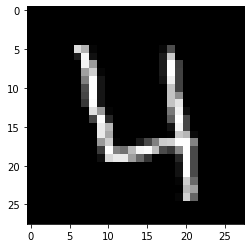

4


In [11]:
def drawimg(sample):
    img=sample.reshape((28,28))
    pt.imshow(img,cmap='gray')

    pt.show()
drawimg(X_train[3])
print(Y_train[3])

In [12]:
pred=knn(X_train,Y_train,X_test[0])
print(int(pred))

7


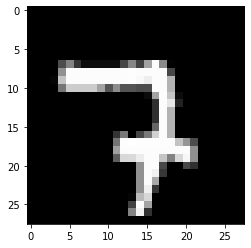

7


In [13]:
drawimg(X_test[0])
print(Y_test[0])

In [16]:
def accuracy(X_test,Y_test):
    m=2
    count=0
    for i in range(m):
        if(int(knn(X_train,Y_train,X_test[i]))==int(Y_test[i])):
           count=count+1
        
    return count/m

print(accuracy(X_test,Y_test))

1.0
